# Sentiment analysis with BOW representation

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

## Today lab

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Today-lab" data-toc-modified-id="Today-lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Today lab</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#About-Train,-validation-and-test-sets" data-toc-modified-id="About-Train,-validation-and-test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7" rel="nofollow" target="_blank">About Train, validation and test sets</a></a></span></li><li><span><a href="#Undestand-the-dataset" data-toc-modified-id="Undestand-the-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Undestand the dataset</a></span></li></ul></li><li><span><a href="#Build-X-(features-vectors)-and-y-(labels)" data-toc-modified-id="Build-X-(features-vectors)-and-y-(labels)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build X (features vectors) and y (labels)</a></span></li><li><span><a href="#Our-previous-baseline" data-toc-modified-id="Our-previous-baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Our previous baseline</a></span></li><li><span><a href="#Build-an-MLP-Classifier" data-toc-modified-id="Build-an-MLP-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build an MLP Classifier</a></span></li></ul></div>

## Load dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/joris/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/joris/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/joris/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/joris/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/joris/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/joris/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!

True

In [2]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


## Build X (features vectors) and y (labels)

In [3]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

In [5]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

## Features extraction

A bag-of-words model is a way of extracting features from text so the text input can be used with machine learning algorithms or neural networks.

Each document, in this case a review, is converted into a vector representation. The number of items in the vector representing a document corresponds to the number of words in the vocabulary. The larger the vocabulary, the longer the vector representation, hence the preference for smaller vocabularies in the previous section.

Words in a document are scored and the scores are placed in the corresponding location in the representation.

In order to extract feature, you can use `CountVectorizer` or `TfidfVectorizer` and you can perform the desired text cleaning.

$$[TODO - Students]$$ 
> * Quickly remind what are `CountVectorizer`, `TfidfVectorizer` and how they work.\
`CountVectorizer` counts how many times a word occurs in the analysed text.\
`TfidfVectorizer` also counts how many times a word occurs in the analysed text, but then it compares it with its usual frequency within the whole corpus. This allows to get an idea of how a word is over-represented in the analyzed text and it disregards words that simply occur a lot in the whole corpus.

> * Build the BOW representation for train and test set

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:

preproc_pipe = make_pipeline(
    TfidfVectorizer(),
)
# Extract features
preproc_X_train = preproc_pipe.fit_transform(X_train)
preproc_X_test = preproc_pipe.transform(X_test)

## Build a baseline with logistic regression.

Using the previous BOW representation, fit a logistic regression model and evaluate it.

$$[TODO - Students]$$ 
> * Quickly remind what are `LogisticRegression` and how they work.\
`LogisticRegression` computes a prediction probability for each of the classes

In [36]:
y_train.value_counts().sort_index()

1     885
2     291
3     385
4     747
5    2692
Name: Rating, dtype: int64

> * what are the possible metrics. Choose one and justify your choice.\
We could use accuracy, recall, precision or f1-score. I choose to use the f1-score because our data set is unbalanced (class 1 ->  885, class 2 ->  291, class 3 ->  385, class 4 ->  747, class 5 -> 2692, )


In [57]:
# Build your model
clf = LogisticRegression()

param_search = {
    # "penalty": ["l1", "l2"],
    "C": np.linspace(0.01,4),
    "max_iter": [1000],
}

search = RandomizedSearchCV(clf, param_search, n_jobs=-1, verbose=1, scoring="f1_weighted")
search.fit(preproc_X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([0.01      , 0.09142857, 0.17285714, 0.25428571, 0.33571429,
       0.41714286, 0.49857143, 0.58      , 0.66142857, 0.74285714,
       0.82428571, 0.90571429, 0.98714286, 1.06857143, 1.15      ,
       1.23142857, 1.31285714, 1.39428571, 1.47571429, 1.55714286,
       1.63857143, 1.72      , 1.80142857, 1.88285714, 1.96428571,
       2.04571429, 2.12714286, 2.20857143, 2.29      , 2.37142857,
       2.45285714, 2.53428571, 2.61571429, 2.69714286, 2.77857143,
       2.86      , 2.94142857, 3.02285714, 3.10428571, 3.18571429,
       3.26714286, 3.34857143, 3.43      , 3.51142857, 3.59285714,
       3.67428571, 3.75571429, 3.83714286, 3.91857143, 4.        ]),
                                        'max_iter': [1000]},
                   scoring='f1_weighted', verbose=1)

In [60]:
log_reg_params = search.best_params_
log_reg_params, log_reg_score

({'max_iter': 1000, 'C': 3.267142857142857}, 0.6220028225017463)

In [65]:
# Evaluate your model
y_pred = search.predict(preproc_X_test)
log_reg_score = f1_score(y_test, y_pred, average="weighted")
print(f"Logistic Regression best score: {round(log_reg_score, 4)}")

Logistic Regression best score: 0.6346


## Build an MLP Classifier


In [124]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

$$[TODO - Students]$$ 
> * Quickly remind what are `Multi Layer Perceptron` and how they work.\
`Multi Layer Perceptron` is a class of feed-forward neural network. They contain an input layer, an output layer and one or more hidden layer, each with an activation function.
> * If necessary, One hot encode the output vectors

In [89]:
# Encode output vector if necessary.
from sklearn.preprocessing import OneHotEncoder
ohe_y = OneHotEncoder()
y_train_ohe = ohe_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_ohe = ohe_y.transform(y_test.values.reshape(-1, 1))

$$[TODO - Students]$$ 
> * What is the size of the input vector and the output vector?

In [135]:
# Define constant
input_dim = preproc_X_train.shape[1] # number of features of X_train
output_dim = y_train_ohe.shape[1] # number of classes (that we spread into 5 dimensions by OneHotEncod-ing)

$$[TODO - Students]$$ 

> * Build a simple network to predict the star rating of a review using the functional API. It should have the following characteristic : one hidden layer with 256 nodes and relu activation.
> * What is the activation function of the output layer?

In [165]:
preproc_X_train

<5000x8991 sparse matrix of type '<class 'numpy.float64'>'
	with 135386 stored elements in Compressed Sparse Row format>

In [164]:
# from layers import Input, Dense
# inputs = keras.Input(shape=(N_features, ))
# x = Dense(16, activation='relu')(inputs)
# x = Dense(8, activation='relu')(x)
# outputs = Dense(1)(x)
# model = keras.Model(inputs, outputs)
# model.compile(optimizer='sgd', loss='mean_squared_error')
# model.fit(X_train, y_train, epochs=100, validation_split=0.33)
# y_pred= model.predict(X_test)

# Build your MLP
inputs = Input(shape=(input_dim,))
x = Dense(256, activation="relu")(inputs)
outputs = Dense(output_dim, activation="softmax")(x)
model = Model(inputs, outputs)
model.compile()
model.fit(x=preproc_X_train.toarray(), y=y_train_ohe, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/home/joris/.local/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/joris/.local/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/joris/.local/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/joris/.local/lib/python3.9/site-packages/keras/engine/training.py", line 816, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/joris/.local/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 532, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "/home/joris/.local/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 633, in apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    File "/home/joris/.local/lib/python3.9/site-packages/keras/optimizer_v2/utils.py", line 73, in filter_empty_gradients
        raise ValueError(f"No gradients provided for any variable: {variable}. "

    ValueError: No gradients provided for any variable: (['dense_64/kernel:0', 'dense_64/bias:0', 'dense_65/kernel:0', 'dense_65/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'dense_64/kernel:0' shape=(8991, 256) dtype=float32>), (None, <tf.Variable 'dense_64/bias:0' shape=(256,) dtype=float32>), (None, <tf.Variable 'dense_65/kernel:0' shape=(256, 5) dtype=float32>), (None, <tf.Variable 'dense_65/bias:0' shape=(5,) dtype=float32>)).


Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_42 (Dense)            (None, 256)               512       
                                                                 
 dense_43 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


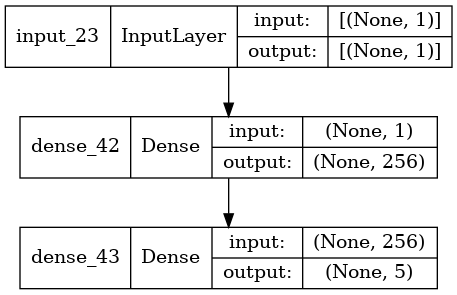

In [129]:
model.summary()
plot_model(model, show_shapes=True)

$$[TODO - Students]$$ 

We are now compiling and training the model.
> * Using the tensorflow documentation, explain the purpose the EarlyStopping callback and detail its arguments.
> * Compile the model
> * Fit the model

In [ ]:
# Compile the model and start training
# Stop training with early stopping with patience of 20


$$[TODO - Students]$$ 

> * Babysit your model: plot learning curves

In [ ]:
# Plot the learning curves and analyze them
# It's possible to plot them very easily using: pd.DataFrame(history.history).plot(figsize=(8,5))

$$[TODO - Students]$$ 

> * How do you interpret those learning curves ?

The model appears to overfit the training data. Various strategies could reduce the overfitting but for this lab we will just change the number and size of layers. We will do that a little later.

> * Evaluate the model (on test part) and plot confusion matrix.
> * Are you doing better or worse than with our first attempt with Logistic regression.

In [ ]:
# Evaluate the model


In [ ]:
# Print/plot the confusion matrix


## Hyper-parameters search

Using [KerasTuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) and modifying various hyper-parameters, improve your model. Change in particular the number of layers, the number of neurons per layer, the dropout, the regularization.